# Challenge Overview and Solution Explanation

> The coding challenge tasked is the use an algorithm of choice to classify whether a mushroom is poisonous or edible.

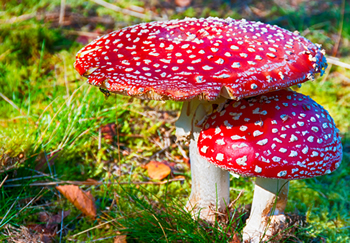

> For this solution, the Logistic Regression package provided from the sci-kit learn libraries was used to create a model that could predict whether a mushroom in our test set was poisonous or edible

In [16]:
import pandas as pd

# Reading in the csv file and creating a data frame
address = "https://raw.githubusercontent.com/ACM-Research/Coding-Challenge-S22/main/mushrooms.csv"
mushrooms = pd.read_csv(address)

#Printing the data frame to the console
mushrooms.head()

## Pre-Processing 

> The mushrooms were given a character value for each of its attributes, for example, for cap-surface the attribute values were f, g, y, s which represent a fibrous, grooves, scaly, or smooth cap-surface respectively. 

> As a result, these catagorical variables for each of the attributes needed to be encoded, such that the logistic regression model could be applied to it.

> After reading through the article linked below as well as many other sources, I decided that using Dummy Encoding as opposed to One-hot encoding or any other encoding would be most helpful for my task.

>Helpful documentation that guided the preprocessing of the dataset was [this article on using one-hot as well as dummy encoding to encode the categorical variables.](https://towardsdatascience.com/encoding-categorical-variables-one-hot-vs-dummy-encoding-6d5b9c46e2db) 


In [95]:
# Creating the dummy variables for each of the categories
mushrooms_encoded = pd.get_dummies(mushrooms, prefix = {'class' : 'class',
                                                'cap-shape' : 'cap-shape',
                                                'cap-surface' : 'cap-surface',
                                                'cap-color' : 'cap-color',
                                                'bruises' : 'bruises',
                                                'odor' : 'odor',
                                                'gill-attachment' : 'gill-attachment',
                                                'gill-spacing' : 'gill-spacing',
                                                'gill-size' : 'gill-size',
                                                'gill-color' : 'gill-color',
                                                'stalk-shape' : 'stalk-shape',
                                                'stalk-root' : 'stalk-root',
                                                'stalk-surface-above-ring' : 'stalk surface-above-ring',
                                                'stalk-surface-below-ring' : 'stalk surface-below-ring',
                                                'stalk-color-above-ring' : 'stalk-color-above-ring',
                                                'stalk-color-below-ring' : 'stalk-color-below-ring',
                                                'veil-type' : 'veil-type',
                                                'veil-color' : 'veil-color',
                                                'ring-number' : 'ring-number',
                                                'ring-type' : 'ring-type',
                                                'spore-print-color' : 'spore-print-color',
                                                'population' : 'population',
                                                'habitat' : 'habitat'
                                               },
                                                
                                                
                           drop_first = True
)
#Printing the mushrooms_encoded data frame, which has the dummy variables and
#values for each of the categories
mushrooms_encoded.head()



,class_p,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,0,0,0,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


## Logistic Regression

> Here, we apply the Logistic Regression algorithm to the data set to help us classify whether a mushroom is poisonous or edible. After creating our model and splitting our data into the training and test sets, we fit our model, predict whether each of the mushrooms in the test set is poisonous or edible and create a chart showing the true value and our predicted values for each of the mushrooms in the test set. Note that a random_state is specified when splitting the data, while not required it does keep results consistent from run to run.

> Some of the helpful documentation I found when creating the model was [this article which applied a similar process to the titanic dataset](https://towardsdatascience.com/python-scikit-learn-logistic-regression-classification-eb9c8de8938d) as well as the sci-kit learn documentation on [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) as well as on the [Logistic Regression model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [169]:
# Importing libraries to apply logistic regression to the dataset
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Extracting explanatory variables (X) and target variable (y)
y = mushrooms_encoded.class_p
X = mushrooms_encoded.drop(['class_p'], axis =1)

# Splitting data into training test and test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25,
                                                   random_state = 123)
                                                  
# Fitting logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Using the model to predict whether a mushroom is poisonous or edible
# in the test set
y_pred = pd.Series(model.predict(X_test))

# Table shows true edibility of mushroom and prediction from the model
# (0 = edible, 1 = poisonous)
y_test = y_test.reset_index(drop = True)
z = pd.concat([y_test, y_pred], axis = 1)
z.columns = ['True', 'Prediction']
z.head()


,True,Prediction
0,0,0
1,0,0
2,0,0
3,1,1
4,0,0


## Evaluating Accuracy

> Here we evaluate the accuracy of our linear regression model using methods from the metrics package we imported from sci-kit learn. 

> Some of the helpful documentation that I used to both understand the concepts of accuracy, precision, and recall as well as evaluate the scores for the model was the [accuracy_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html), [precision_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html), and [recall_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html) documantation articles from sci-kit learn.

In [168]:

# Evaluating the accuracy of the model using the metric library
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))


Accuracy: 0.999015263417036
Precision: 1.0
Recall: 0.997920997920998


## Plotting the confusion matrix

> A confusion matrix is a table that allows us to visualize the performance of an algorithm. I decided to use a heatmap to show how well the model was able to predict whether a mushroom was poisonous or edible in the test set.

> Here, we can see that for the most part, the model predicted the correct edibility for the mushrooms in the test set, with 1069 true positives (an edible mushroom wes predicted to be edible) and 960 true negatives (a poisonous mushroom was predicted to be poisonous). However, the model did have two false negatives (a mushroom was predicted to not be poisonous when it was).

> Some helpful documentation that I used was an explanation of [including labels in an sns heatmap](https://datascience.stackexchange.com/questions/31746/how-to-include-labels-in-sns-heatmap) as well as the documentation on [seaborn heatmaps](https://seaborn.pydata.org/generated/seaborn.heatmap.html)

Text(0.5, 15.0, 'Predicted Edibility')

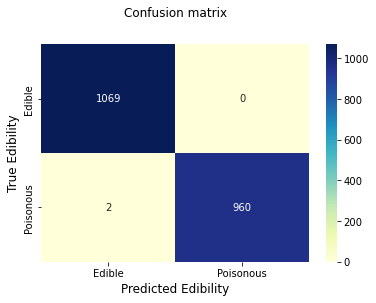

In [171]:
# Importing libaries to plot a confusion matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Creating the confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

#Creating the heatmap
x_axis_labels = ['Edible', 'Poisonous']
y_axis_labels = ['Edible', 'Poisonous']
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g',
           xticklabels = x_axis_labels, yticklabels = y_axis_labels)
ax.xaxis.set_label_position("top")
plt.title('Confusion matrix', y=1.1)
plt.ylabel('True Edibility', fontsize = 'large')
plt.xlabel('Predicted Edibility', fontsize = 'large')
